# Comparison of Metabolic Reconstruction
In this notebook we compare iCHO3K with previous Chinese Hamster Metabolic Reconstructions and disect the reactions and subsytems incorporated from other models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from collections import Counter
from functools import reduce
from cobra.io import read_sbml_model, load_json_model, load_matlab_model

## 1. Conf. Score Distribution

In [ ]:
# Load iCHO3K reactions excel file

rxns = pd.read_excel("../iCHO3K/Dataset/iCHO3K.xlsx", sheet_name="Rxns") 

In [ ]:
#### --- Conf. Score distribution throughout the dataset --- ####
data_numeric = pd.to_numeric(rxns['Conf. Score'], errors='coerce')
data_numeric = data_numeric.dropna()

# Plotting the histogram
plt.figure(figsize=(10, 4))
plt.hist(data_numeric, bins='auto', color='steelblue', edgecolor='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(data_numeric.unique())
plt.xlabel('Values', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Confidence Score Distribution', fontsize=14, fontweight='bold')

plt.savefig('../Analyses/conf_score_distribution.png', dpi=300)
plt.show()

## 2. Subsystems

In [ ]:
# Generate models for comparison
icho1766 = read_sbml_model('../Data/reconciliation/models/iCHOv1_final.xml')
icho2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
icho2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
iCHO3K = load_json_model('iCHO3K.json')

In [ ]:
#### --- Calculate the amount of reactions per Subsystem ---- ####

#iCHO 1766
subs = []
for reaction in icho1766.reactions:
    subs.append(reaction.subsystem.upper())
    
icho1766_subs = Counter(subs)

#iCHO 2291
subs = []
for reaction in icho2291.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2291_subs = Counter(subs)

# iCHO 2101
subs = []
for reaction in icho2101.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2101_subs = Counter(subs)

#iCHO 3K
subs = []
for reaction in iCHO3K.reactions:
    subs.append(reaction.subsystem.upper())
    
iCHO3K_subs = Counter(subs)

In [5]:
# Mapping of subsystems to categories (systems)

# Updated Mapping of subsystems to categories
category_mapping = {
    'Amino Acid Metabolism': [
        'AMINO ACID METABOLISM',
        'ALANINE AND ASPARTATE METABOLISM',
        'AMINO ACID DERIVATIVE',
        'ARGININE AND PROLINE METABOLISM',
        'BETA-ALANINE METABOLISM',
        'CYSTEINE METABOLISM',
        'D-ALANINE METABOLISM',
        'GLUTAMATE METABOLISM',
        'GLUTATHIONE METABOLISM',
        'GLYCINE, SERINE, ALANINE AND THREONINE METABOLISM',
        'GLYCINE, SERINE, AND THREONINE METABOLISM',
        'HISTIDINE METABOLISM',
        'LYSINE METABOLISM',
        'METHIONINE AND CYSTEINE METABOLISM',
        'METHIONINE METABOLISM',
        'PEPTIDE METABOLISM',
        'PHENYLALANINE METABOLISM',
        'SELENOAMINO ACID METABOLISM',
        'SPERMINE DEGRADATION',  # Added
        'TAURINE AND HYPOTAURINE METABOLISM',
        'TRYPTOPHAN METABOLISM',
        'TYROSINE METABOLISM',
        'UREA CYCLE',
        'UREA CYCLE/AMINO GROUP METABOLISM',
        'VALINE, LEUCINE, AND ISOLEUCINE METABOLISM'
    ],
    'Carbohydrates Metabolism': [
        'ALKALOID SYNTHESIS',
        'AMINOSUGAR METABOLISM',
        'ASCORBATE AND ALDARATE METABOLISM',
        'BUTANOATE METABOLISM',
        'C5-BRANCHED DIBASIC ACID METABOLISM',
        'FRUCTOSE AND MANNOSE METABOLISM',
        'GALACTOSE METABOLISM',
        'GLYOXYLATE AND DICARBOXYLATE METABOLISM',
        'HEPARAN SULFATE DEGRADATION',
        'HYALURONAN METABOLISM',
        'LIMONENE AND PINENE DEGRADATION',
        'LIPOATE METABOLISM',
        'PENTOSE AND GLUCURONATE INTERCONVERSIONS',
        'PROPANOATE METABOLISM',
        'PYRUVATE METABOLISM',
        'STARCH AND SUCROSE METABOLISM',
        'STILBENE, COUMARINE AND LIGNIN SYNTHESIS',
        'OTHER CARBON METABOLISM'
    ],
    'Energy Metabolism': [
        'BIOMASS',
        'BIOMASS SYNTHESIS',
        'CITRIC ACID CYCLE',
        'GLYCOLYSIS/GLUCONEOGENESIS',
        'OXIDATIVE PHOSPHORYLATION',
        'PENTOSE PHOSPHATE PATHWAY',
        'ROS DETOXIFICATION',
        'CENTRAL CARBON AND ENERGY METABOLISM'
    ],
    'Exchange/Transport': [
        'EXCHANGE/DEMAND/SINK',
        'EXCHANGE/DEMAND REACTION',
        'EXCHANGE/DEMAND/SINK REACTION',
        'EXCHANGE',
        'DEMAND',
        'SINK',
        'TRANSPORT, ENDOPLASMIC RETICULAR',
        'TRANSPORT, EXTRACELLULAR',
        'TRANSPORT, GOLGI APPARATUS',
        'TRANSPORT, LYSOSOMAL',
        'TRANSPORT, MITOCHONDRIAL',
        'TRANSPORT, NUCLEAR',
        'TRANSPORT, PEROXISOMAL',
        'TRANSPORT'
    ],
    'Lipid Metabolism': [
        'ARACHIDONIC ACID METABOLISM',
        'BILE, EICOSANOID AND STEROID METABOLISM',
        'BILE ACID SYNTHESIS',
        'CARNITINE SHUTTLE',
        'CHOLESTEROL METABOLISM',
        'EICOSANOID METABOLISM',
        'FATTY ACID METABOLISM',
        'FATTY ACID OXIDATION',
        'FATTY ACID SYNTHESIS',
        'FATTY ACID ELONGATION',
        'GLYCAN AND GLYCOSAMINOGLYCAN METABOLISM',
        'GLYCEROLIPID METABOLISM',
        'GLYCEROPHOSPHOLIPID METABOLISM',
        'GLYCOSPHINGOLIPID METABOLISM',
        'GLYCOSYLPHOSPHATIDYLINOSITOL-ANCHOR BIOSYNTHESIS',
        'GLYCOSYLPHOSPHATIDYLINOSITOL (GPI)-ANCHOR BIOSYNTHESIS',
        'GLYCEROPHOSPHOLIPID, SPHINGOLIPID AND INOSITOL METABOLISM'
        'INOSITOL PHOSPHATE METABOLISM',
        'LINOLEATE METABOLISM',
        'PHOSPHATIDYLINOSITOL PHOSPHATE METABOLISM',
        'R GROUP SYNTHESIS',
        'SPHINGOLIPID METABOLISM',
        'SQUALENE AND CHOLESTEROL SYNTHESIS',
        'TRIACYLGLYCEROL SYNTHESIS'
    ],
    'Nucleotide Metabolism': [
        'NUCLEOTIDE SALVAGE PATHWAY',
        'NUCLEOTIDE INTERCONVERSION',
        'NUCLEOTIDES',
        'PURINE METABOLISM',
        'PURINE CATABOLISM',
        'PURINE SYNTHESIS',
        'PYRIMIDINE METABOLISM',
        'PYRIMIDINE BIOSYNTHESIS',
        'PYRIMIDINE CATABOLISM',
        'PYRIMIDINE SYNTHESIS',
        'NUCLEOTIDE SUGAR METABOLISM',
        'NUCLEOTIDE METABOLISM',
        'NUCELOTIDE METABOLISM',
        'SALVAGE PATHWAY'
    ],
    'Protein Product Synthesis': [
        'BLOOD GROUP SYNTHESIS',
        'CHONDROITIN SULFATE DEGRADATION',
        'CHONDROITIN SYNTHESIS',
        'KERATAN SULFATE METABOLISM',
        'KERATAN SULFATE SYNTHESIS',
        'N-GLYCAN METABOLISM',
        'N-GLYCAN BIOSYNTHESIS',
        'N-GLYCAN SYNTHESIS',  # Added
        'N-GLYCAN DEGRADATION',
        'O-GLYCAN SYNTHESIS',
        'PROTEIN ASSEMBLY',
        'PROTEIN DEGRADATION',
        'PROTEIN MODIFICATION',
        'PROTEIN PRODUCTION',
        'GLYCAN AND GLYCOSAMINOGLYCAN METABOLISM'
    ],
    'Unassigned': [
        'UNASSIGNED',
        'MISCELLANEOUS'
    ],
    'Vitamin & Cofactor Metabolism': [
        'ANDROGEN AND ESTROGEN SYNTHESIS AND METABOLISM',
        'BIOTIN METABOLISM',
        'COA METABOLISM',
        'COA SYNTHESIS',
        'COA CATABOLISM',
        'CYTOCHROME METABOLISM',
        'FOLATE METABOLISM',
        'NAD METABOLISM',
        'PORPHYRIN METABOLISM',
        'TETRAHYDROBIOPTERIN METABOLISM',
        'THIAMINE METABOLISM',
        'UBIQUINONE AND OTHER TERPENOID-QUINONE SYNTHESIS',
        'UBIQUINONE SYNTHESIS',
        'VITAMIN A METABOLISM',
        'VITAMIN B2 METABOLISM',
        'VITAMIN B6 METABOLISM',
        'VITAMIN B12 METABOLISM',
        'VITAMIN C METABOLISM',
        'VITAMIN D METABOLISM',
        'VITAMIN D',  # Adjusted to include both variants
        'VITAMIN E METABOLISM',
        'XENOBIOTICS METABOLISM',
        'HEME SYNTHESIS',
        'HEME DEGRADATION',
        'CYP METABOLISM',
        'VITAMIN AND COFACTOR METABOLISM'
    ]
}

In [6]:
def allocate_counts(counts_dict, category_mapping):
    from collections import defaultdict
    # Create reverse mapping
    subsystem_to_category = {}
    for category, subsystems in category_mapping.items():
        for subsystem in subsystems:
            subsystem_to_category[subsystem.upper()] = category
    
    # Initialize category counts
    category_counts = defaultdict(int)
    
    # Allocate counts
    for subsystem, count in counts_dict.items():
        subsystem_upper = subsystem.upper()
        if subsystem_upper in subsystem_to_category:
            category = subsystem_to_category[subsystem_upper]
            category_counts[category] += count
        else:
            category_counts['Other'] += count
    
    return category_counts

In [ ]:
# Allocate counts for each dictionary
icho1766_systems = allocate_counts(icho1766_subs, category_mapping)
icho2101_systems = allocate_counts(icho2101_subs, category_mapping)
icho2291_systems = allocate_counts(icho2291_subs, category_mapping)
iCHO3K_systems = allocate_counts(iCHO3K_subs, category_mapping)

In [ ]:
# Create a list of datasets
datasets = {
    'iCHO1766': icho1766_systems,
    'iCHO2101': icho2101_systems,
    'iCHO2291': icho2291_systems,
    'iCHO3K': iCHO3K_systems
}

# Get the list of all categories
all_categories = set()
for counts in datasets.values():
    all_categories.update(counts.keys())

all_categories = sorted(all_categories)

# Initialize DataFrame
df = pd.DataFrame(index=all_categories)

# Populate DataFrame
for dataset_name, counts in datasets.items():
    df[dataset_name] = [counts.get(category, 0) for category in all_categories]

# Replace NaN with 0 (in case there are any)
df = df.fillna(0)

# Compute total reactions per dataset
total_reactions = df.sum(axis=0)

# Add 'Total Reactions' as a new row to 'df'
df.loc['Total Reactions'] = total_reactions

In [ ]:
# Exclude 'Total Reactions' for plotting
df_plot = df.drop(['Total Reactions', 'Other'], axis=0)

# Extract categories and datasets
categories = df_plot.index.tolist()
datasets = df_plot.columns.tolist()
n_categories = len(categories)
n_datasets = len(datasets)

# Define bar heights and positions
bar_height = 0.8 / n_datasets  # Adjust the bar height based on the number of datasets
y_positions = np.arange(n_categories)

# Set a professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors from your style
model_names = datasets  # Assuming datasets are in the same order as colors

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

for i, (dataset, color) in enumerate(zip(datasets, colors)):
    counts = df_plot[dataset].values
    # Calculate positions for each dataset's bars
    positions = y_positions - 0.4 + i * bar_height + bar_height / 2
    bars = ax.barh(positions, counts, height=bar_height, label=dataset, color=color,
                   edgecolor='black', linewidth=0.3)

    # Annotate bars with their values
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left', va='center',
                    fontweight='light', fontsize=8)

# Customize the plot
ax.set_yticks(y_positions)
ax.set_yticklabels(categories, fontsize=10)
ax.set_title('Reaction Counts per System Across Models',
             fontsize=15, fontweight='light', pad=15)

# Invert the y-axis to reverse the order of the bars
ax.invert_yaxis()

# Add grid lines
ax.grid(True, linestyle='-', linewidth=0.5, axis='x', color='gray', alpha=0.7)

# Remove spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust x-axis ticks
ax.tick_params(axis='x', labelsize=10)

# Create custom handles for the legend
custom_handles = [mpatches.Patch(color=color, label=model_name)
                  for color, model_name in zip(colors, model_names)]


# Adjust layout
plt.tight_layout()

# Save the plot (adjust the path as needed)
plt.savefig('../Analyses/recons_comparisons/metabolic_models_comparison_horizontal_inverted.svg', format='svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 3. Reactions, Genes and Metabolites

In [ ]:
#Reaction counts for each recon
icho1766_rxns = len(icho1766.reactions)
icho2291_rxns = len(icho2291.reactions)
icho2101_rxns = len(icho2101.reactions)
icho3K_rxns = len(iCHO3K.reactions)

#Metabolite counts for each recon
icho1766_mets = len(icho1766.metabolites)
icho2291_mets = len(icho2291.metabolites)
icho2101_mets = len(icho2101.metabolites)
icho3K_mets = len(iCHO3K.metabolites)

# Gene counts for each recon
icho1766_gens = len(icho1766.genes)
icho2291_gens = len(icho2291.genes)
icho2101_gens = len(icho2101.genes)
icho3K_gens = len(iCHO3K.genes)


# Creating a DataFrame from the counts
data = {
    'iCHO1766': [icho1766_rxns, icho1766_mets, icho1766_gens],
    'iCHO2101': [icho2101_rxns, icho2101_mets, icho2101_gens],
    'iCHO2291': [icho2291_rxns, icho2291_mets, icho2291_gens],
    'iCHO3K': [icho3K_rxns, icho3K_mets, icho3K_gens]
}

counts_df = pd.DataFrame(data, index=['Reactions', 'Metabolites', 'Genes'])

# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
    
    # Turn off the first subplot
    ax1, ax2, ax3, ax4 = axes.flatten()
    ax1.axis('off')
    
    # Define the axes for the categories
    axes_mapping = {0: ax2, 1: ax3, 2: ax4}
    categories = ['Reactions', 'Metabolites', 'Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=10)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([]) # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=12)

    # Remove border of the plots
    for ax in [ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Create custom handles for the legend
    custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
    fig.legend(handles=custom_handles, loc='upper left',bbox_to_anchor=(0.05, 0.9), fontsize=13, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    plt.savefig('../Analyses/recons_comparisons/metabolic_models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
create_research_plot(counts_df)

In [ ]:
import re
list2 = [m.id[:-2] for m in icho1766.metabolites]
set2 = set(list2)
print(len(list2))
print(len(set2))
print('----------------------------------------')
list3 = [m.id[:-2] for m in icho2101.metabolites]
set3 = set(list3)
print(len(list3))
print(len(set3))
print('----------------------------------------')
list4 = [m.id[:-2] for m in icho2291.metabolites]
set4 = set(list4)
print(len(list4))
print(len(set4))
print('----------------------------------------')
list5 = [m.id[:-2] for m in iCHO3K.metabolites]
set5 = set(list5)
print(len(list5))
print(len(set5))

In [ ]:
# Initialize a dictionary to store the counts
counts = {
    'Model': [],
    'Reactions with GPR': [],
    'Reactions without GPR': [],
    'Total Reactions': []
}

# Loop through the models and calculate counts
models = [icho1766, icho2291, icho2101, iCHO3K]#, recon3d]
model_names = ['iCHO1766', 'iCHO2291', 'iCHO2101', 'iCHO3K']#, 'Recon3D']

for model, name in zip(models, model_names):
    rxn_with_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) not in ['', 'nan'])
    rxn_without_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) in ['', 'nan'])
    total = len(model.reactions)

    counts['Model'].append(name)
    counts['Reactions with GPR'].append(rxn_with_gpr)
    counts['Reactions without GPR'].append(rxn_without_gpr)
    counts['Total Reactions'].append(total)

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(counts)
counts_df['%'] = (counts_df['Reactions with GPR']/counts_df['Total Reactions'])*100

# Setting the index to the model names
counts_df.set_index('Model', inplace=True)

def plot_gpr_coverage(counts_df):
    # Create a plot with the right size and stacked bars directly
    ax = counts_df[['Reactions with GPR', 'Reactions without GPR']].plot(
        kind='bar', stacked=True, color=['#bcbd22', '#17becf'], edgecolor='black', linewidth=.3, width=0.8, legend=False, figsize=(6, 6))
    plt.title('GPR Coverage', fontsize=20, pad=10)


    # Label configuration
    ax.tick_params(axis='x', rotation=0)  # Set rotation for x ticks if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels if needed
    ax.set_xlabel('')

    # Grid and axis adjustments
    ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
    ax.set_axisbelow(True)  # Ensure grid is behind the bars

    # Hide x-axis ticks
    ax.tick_params(axis='x', which='both', length=0, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    # Remove plot frame borders
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    # Legend configuration
    ax.legend(loc='center left',bbox_to_anchor=(0.1, 1.4), fontsize=16, frameon=False, fancybox=False, shadow=False)


    # Optimize layout
    plt.tight_layout()

    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/gpr_coverage.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


# Call the function with the DataFrame
plot_gpr_coverage(counts_df)

In [ ]:
counts_df

## 4. Gene Essentiality

In [ ]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time
import cobra
from cobra.io import load_json_model, read_sbml_model, load_matlab_model
from cobra.flux_analysis.variability import find_essential_genes, find_essential_reactions

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [ ]:
# Load Models

iCHO3K = load_json_model('iCHO3K_unblocked.json')
iCHO1766 = read_sbml_model('../Data/Reconciliation/models/iCHOv1_final.xml')
iCHO2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
iCHO2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
WT_P4_Bio141 = load_matlab_model('../Data/Context_specific_models/AUG15_reduced_model_CF_WT_P4_Bio141.mat')
WT_P4_Bio142 = load_matlab_model('../Data/Context_specific_models/AUG25_reduced_model_CF_WT_P4_Bio142.mat')
WT_P4_Bio143 = load_matlab_model('../Data/Context_specific_models/AUG15_reduced_model_CF_WT_P4_Bio143.mat')

In [ ]:
# Load the dataset for the experimentally validated essential genes

exp_essential_genes = pd.read_csv('../Data/Gene_Essentiality/cho_essential_genes.csv', sep='\t')
exp_essential_genes['gene'] = exp_essential_genes['gene'].str.replace('__1$', '', regex=True)
# Extract all gene names
all_gene_names = set()
for names in exp_essential_genes['gene']:
    for name in names.split('|'): #Extract the names of the genes with two aliases
        all_gene_names.add(name)

In [ ]:
''' In case of retrieving the gene ID please activate this code
# Generation gene ID of exp_essential_genes with biopython
from Bio import Entrez
import pandas as pd

# Set your email (this is required by NCBI for accessing their services)
Entrez.email = "dh.choi@orcid"

# Your dataset with gene symbols (replace with actual dataframe)
gene_symbols = exp_essential_genes.gene  # Example gene symbols

# Function to fetch gene ID using Entrez API
def get_gene_id(gene_symbol):
    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")
    record = Entrez.read(search_handle)
    search_handle.close()
    if record["IdList"]:
        return record["IdList"][0]  # Return the first gene ID found
    else:
        return None

# Create a DataFrame to store gene symbols and their corresponding gene IDs
df = pd.DataFrame({'gene': gene_symbols})
df['entrez_gene_id'] = df['gene'].apply(get_gene_id)

# Display the result
print(df)

# Save the DataFrame to a pickle file
with open("gene_id_mapping.pkl", "wb") as f:
    pickle.dump(df, f)

# Save the result to a CSV file as well, if needed
df.to_csv("gene_id_mapping.csv", index=False)

'''

In [ ]:
# Load the DataFrame from the pickle file
with open("gene_id_mapping.pkl", "rb") as f:
    df_loaded = pickle.load(f)

# Display the loaded DataFrame
print(df_loaded)

In [ ]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_raw_wt_dict.pkl', 'rb') as file:
    uptsec_wt = pickle.load(file)

In [ ]:
def constraint_model_feg(model, time, exp_dict, objective=None, solver=None, make_GM=None):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - time: Time interval for applying the experimental constraints. Default is 'P2 to P4'.
    - objective: The objective reaction. Default is 'biomass_cho_s'.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    
    GM = model.copy()  # Copy the model to avoid modifying the original
    temp_dict = exp_dict
    
    # Default values if no argument is provided
    if objective is None:
        objective = 'biomass_cho_s'
    if solver is None:
        solver = 'gurobi'

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    # Constraint the model with experimental data
    #if objective is None:
    #    GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    
    for rxn in GM.boundary:
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue

        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.001,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
        if rxn.id.startswith("SK_"):
            rxn.bounds = (-0.00001,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
    model_exp_constrained = GM 
    
    if make_GM == True:
        for rxn in GM.boundary:
            if rxn.id in temp_dict.keys():
                rxn.bounds = (-1000,1000)
                print(rxn.bounds)
                print(rxn)
                continue
        pfba_solution_GM = cobra.flux_analysis.pfba(GM)
        pfba_obj_GM = pfba_solution_GM.fluxes[objective] 
        print(f"Optimized objective w/ opened bounds (growth rate): {pfba_obj_GM}")
    else: 
        pfba_obj_GM =[]
        GM = []
            
            
    # Perform pFBA (parsimonious FBA) to minimize the total flux
    pfba_solution = cobra.flux_analysis.pfba(model_exp_constrained)
    pfba_obj = pfba_solution.fluxes[objective]

    # Print and return the objective value and the full pFBA solution
    print(f"Optimized objective w/ exp constraints (growth rate): {pfba_obj}")
    
    # Return the objective value and the full pFBA solution
    return model_exp_constrained, pfba_obj, pfba_solution, pfba_obj_GM, GM

In [ ]:
def constraint_model_feg_v2(model, exp_dict, exp_cond, exp_time, objective='biomass_cho_s', solver='gurobi'):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - exp_dict: Dictionary containing experimental constraints for reactions.
        - objective: The objective reaction. Default is 'biomass_cho_s'.
    - exp_cond: Experimental condition identifier.
    - exp_time: Experimental time point.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - model_exp_constrained: The constrained COBRA model.
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    # Copy the model to avoid modifying the original
    GM = model.copy()
    temp_dict = exp_dict

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    
    # Open the bounds for the biomass reaction
    GM.reactions.get_by_id(objective).bounds = (0, 1000)
    
    for rxn in GM.boundary:
        # Keep boundaries open for essential metabolites
        if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
            rxn.bounds = (-1000, 1000)
        elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
            rxn.bounds = (-0.001, 1000)
        elif rxn.id.startswith(("EX_", "SK_", "DM_")):
            rxn.bounds = (0, 1000)  # Close uptake rates for others

    print(f'Calculating Growth Rate...')
    exp_gr = exp_dict['exp_growth_rate'][(exp_cond, exp_time)]
    print(f'Experimental growth rate is: {exp_gr}')
    
    for reaction in GM.reactions:
        if reaction.id == 'EX_etoh_e':  # Model creates infeasible solutions when secreting ethanol
            continue
        for r, v in exp_dict.items():
            if reaction.id == r:
                reaction.upper_bound = 1000
                reaction.lower_bound = v[(exp_cond, exp_time)]

    pfba_solution = cobra.flux_analysis.pfba(GM)
    pfba_obj = pfba_solution.fluxes[objective]
    print(f'Simulated growth rate is: {pfba_obj}')

    return GM, pfba_obj, pfba_solution

In [ ]:
## Pablo's modifification


def find_and_match_essential_genes(model, df_exp_essential, save_csv=True, print_df=False, model_GM = None):
    """
    This function finds and matches essential genes in the model with experimental Entrez gene data.
    It returns the number of total matched genes (len_mat) and the number of essential matched genes (len_mat_ess).
    """

    # Check if the necessary columns 'entrez_gene_id' and 'gene' exist in the dataframe
    required_columns = ['entrez_gene_id', 'gene']
    for col in required_columns:
        if col not in df_exp_essential.columns:
            raise KeyError(f"Column '{col}' is missing from the dataframe.")

    # Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
    entrez_dict = df_exp_essential.set_index('entrez_gene_id')['gene'].to_dict()

    # Matching metabolic genes
    tmp_gene = []    
    for gene in model.genes:
        # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
        if gene.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene.id]
            tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
    
    # Number of total matched genes
    len_mat = len(tmp_gene)

    # Find the essential reactions for the given model
    threshold = model.slim_optimize(error_value=None) * 0.9
    essential_reactions = find_essential_reactions(model, threshold=threshold)

    # Remove tRNA biosynthesis reactions (specifically from iCHO2291)
    essential_reactions = [r for r in essential_reactions if not (r.subsystem == 'Biomass synthesis' and r.id.endswith('TRS'))]


    # Extract genes from the essential reactions list
    essential_genes = set([g for r in essential_reactions for g in r.genes])
        
    # Create a list to store the matched essential genes
    matched_genes = []

    # Iterate over the essential genes and check if they match with the Entrez Gene IDs
    for gene in essential_genes:
        gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

        if gene_exp_ess.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
            matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))

    # Convert the matched essential genes into a DataFrame
    matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

    # Save the result to a CSV file if save_csv is True
    if save_csv:
        matched_genes_essential_df.to_csv("'../Data/Gene_Essentiality/matched_gene_entrez_ids_feg.csv", index=False)

    # Print the DataFrame if print_df is True
    if print_df:
        print(matched_genes_essential_df)

    # Number of essential matched genes
    len_mat_ess = len(matched_genes_essential_df)
    
    if model_GM is None:
        # Print the summary information
        print(f"Total matched metabolic genes: {len_mat}")
        print(f"Matched essential genes: {len_mat_ess}/{len_mat}")
        print(f"Total simulated essential genes: {len(essential_genes)}")
        len_mat_GM_ess = []
    else: 
        
        essential_genes = find_essential_genes(model_GM)

        # Create a list to store the matched essential genes
        matched_genes_GM = []

        # Iterate over the essential genes and check if they match with the Entrez Gene IDs
        for gene in essential_genes:
            gene_exp_ess_GM = model_GM.genes.get_by_id(gene.id)  # Get the gene from the model

            if gene_exp_ess_GM.id in entrez_dict:
                entrez_gene_symbol = entrez_dict[gene_exp_ess_GM.id]
                matched_genes_GM.append((gene_exp_ess_GM.id, gene_exp_ess_GM.name, entrez_gene_symbol))

        # Convert the matched essential genes into a DataFrame
        matched_genes_essential_GM_df = pd.DataFrame(matched_genes_GM, columns=['gene_exp_ess_GM.id', 'gene_exp_ess_GM.name', 'entrez_gene_symbol'])
        len_mat_GM_ess = len(matched_genes_essential_GM_df)
        # Print the summary information
        print(f"Total matched metabolic genes_GM: {len_mat}")
        print(f"Matched essential genes_GM: {len_mat_GM_ess}/{len_mat}")
        print(f"Total simulated essential genes_GM: {len(essential_genes)}")
        


    # Return the matched DataFrame and gene counts
    return matched_genes_essential_df, len_mat, len_mat_ess, len_mat_GM_ess, essential_reactions

In [ ]:
def update_reaction_ids_specific(model):
    # Iterate over each reaction in the model
    for rxn in model.reactions:
        # Check if the reaction ID contains "(e)"
        if "(e)" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("(e)", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(c)" in rxn.id:
            new_id = rxn.id.replace("(c)", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(x)" in rxn.id:
            new_id = rxn.id.replace("(x)", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(r)" in rxn.id:
            new_id = rxn.id.replace("(r)", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(g)" in rxn.id:
            new_id = rxn.id.replace("(g)", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_e_" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("_e_", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_c_" in rxn.id:
            # Replace "_c_" with "_c"
            new_id = rxn.id.replace("_c_", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_x_" in rxn.id:
            new_id = rxn.id.replace("_x_", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_r_" in rxn.id:
            new_id = rxn.id.replace("_r_", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_g_" in rxn.id:
            new_id = rxn.id.replace("_g_", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
    return model

In [ ]:
iCHO2291_changed = update_reaction_ids_specific(iCHO2291)
iCHO1766_changed = update_reaction_ids_specific(iCHO1766)
iCHO2101_changed = update_reaction_ids_specific(iCHO2101)

In [ ]:
exp_time = 'P2 to P4'

In [ ]:
GM_constrained_WT_P4_Bio141, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U1', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio141,len_WT_P4_Bio141,len_3WT_P4_Bio141_ess, len_WT_P4_Bio141_ess_GM, WT_P4_Bio141_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio141, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_WT_P4_Bio142, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U2', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio142,len_WT_P4_Bio142,len_3WT_P4_Bio142_ess, len_WT_P4_Bio142_ess_GM, WT_P4_Bio142_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio142, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_WT_P4_Bio143, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U3', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio143,len_WT_P4_Bio143,len_3WT_P4_Bio143_ess, len_WT_P4_Bio143_ess_GM, WT_P4_Bio143_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio143, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_1766, _, _, _, GM_unconstrained_1766 = constraint_model_feg(iCHO1766_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_1766,len_1766,len_1766_ess,len_1766_ess_GM, icho1766_essential_reactions = find_and_match_essential_genes(GM_constrained_1766, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_2101, _, _, _, GM_unconstrained_2101 = constraint_model_feg(iCHO2101_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_2101,len_2101,len_2101_ess, len_2101_ess_GM, icho2101_essential_reactions = find_and_match_essential_genes(GM_constrained_2101, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_2291, _, _, _, GM_unconstrained_2291 = constraint_model_feg(iCHO2291_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_2291,len_2291,len_2291_ess, len_2291_ess_GM, icho2291_essential_reactions = find_and_match_essential_genes(GM_constrained_2291, df_loaded, save_csv=False, print_df=True)

In [ ]:
GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(iCHO3K, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM, icho3K_essential_reactions = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

In [ ]:
"""
Dong-Hyuk's modification -  To examine the differences before and after removing ATP and glucose loop reactions from the iCHO3K reconstruction
"""

with iCHO3K as model:
    objective = 'biomass_cho_s'
    model.objective = objective
    
    filtered_atp_loop_reactions = [
    'SCP22x','TMNDNCCOAtx','OCCOAtx','r0391','BiGGRxn67','r2247','r2246','r2245','r2317','HMR_0293',
    'HMR_7741','r1453','r1393','NICRNS','GapFill-R08726','RE2915M','HMR_3288','HMR_1325','RE2439C',
     'r1450','RE3477C','AAPSAS','r0698','3HDH260p','HMR_3272','ACOAD183n3m','GapFill-R01463','r1468',
     'r0655','r0603','r0541','HMR_1329','GapFill-R03599','AKGDm','r0556','OIVD1m','OIVD3m','2OXOADOXm',
     'r0386','r0451','GLYCLm','MACACI'
    ]
    
    glucloop_reactions = [
    'GapFill-R01206', 'GAUGE-R00557', 
    'GAUGE-R00558', 'FNOR', 'GGH', 'r0741', 'r1479', 'XOLESTPOOL'
    ]

    model.remove_reactions(glucloop_reactions, remove_orphans=True)
    model.remove_reactions(filtered_atp_loop_reactions, remove_orphans=True)


    GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(model, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
    matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM, icho3K_essential_reactions_2 = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

In [ ]:
# Data for the bar chart (len_ and len_ess for each model)
data = {
    'iCHO1766': [len_1766, len_1766_ess],
    'iCHO2101': [len_2101, len_2101_ess],
    'iCHO2291': [len_2291, len_2291_ess],
    'iCHO3K': [len_3k, len_3k_ess]
}

# Create a DataFrame
counts_df = pd.DataFrame(data, index=['Matched Genes', 'Matched Essential Genes'])


In [ ]:
# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,2))  
    
    # Define the axes mapping for two categories
    axes_mapping = {0: axes[0], 1: axes[1]}  # Mapping two axes
    categories = ['Matched Genes', 'Matched Essential Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=16)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=12)

    # Remove border of the plots
    for ax in axes:  # Applies to both axes
        for spine in ax.spines.values():
            spine.set_visible(False)

#     # Create custom handles for the legend
#     custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
#     fig.legend(handles=custom_handles, loc='upper left', bbox_to_anchor=(0.15, 0.9), fontsize=10, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/Essential_genes_coverage_comparison.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
create_research_plot(counts_df)

#### Comparisions of Essential genes 

In [ ]:
def find_unique_genes(df1, df2, df3):
    """
    Find unique genes in each DataFrame compared to others.
    """
    # Convert gene columns to sets for comparison
    genes_1 = set(df1['gene_exp_ess.id'])
    genes_2 = set(df2['gene_exp_ess.id'])
    genes_3 = set(df3['gene_exp_ess.id'])

    # Find differences
    unique_1 = genes_1 - genes_2 - genes_3
    unique_2 = genes_2 - genes_1 - genes_3
    unique_3 = genes_3 - genes_2 - genes_1

    return unique_1, unique_2, unique_3

def find_gene_reactions(model, unique_genes):
    """
    For each gene, find associated reactions in the given model.
    """
    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            print(f"Gene ID: {gene.id}, Name: {gene.name}")
            print("Associated Reactions:")
            
            # Print associated reactions
            for reaction in gene.reactions:
                print(f" - {reaction.id}: {reaction.reaction}")
        except KeyError:
            print(f"Gene {gene_id} not found in the model.")
            
def find_gene_reactions_to_excel(model, unique_genes, model_name):
    """
    For each gene, find associated reactions in the given model and store results in a DataFrame.
    """
    results = []

    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            
            # Find associated reactions and append results
            for reaction in gene.reactions:
                results.append({
                    'Gene ID': gene.id,
                    'Gene Name': gene.name,
                    'Reaction ID': reaction.id,
                    'Reaction': reaction.reaction,
                    'Model': model_name
                })
        except KeyError:
            results.append({
                'Gene ID': gene_id,
                'Gene Name': 'Not Found',
                'Reaction ID': 'N/A',
                'Reaction': 'N/A',
                'Model': model_name
            })

    # Convert to DataFrame
    return pd.DataFrame(results)


# Step 1: Find unique genes in each model
unique_2101, unique_2291, unique_3K = find_unique_genes(matched_df_2101, matched_df_2291, matched_df_3K)

# Step 2: Find reactions associated with the unique genes for each model
print("\nReactions for unique genes in iCHO2101:")
find_gene_reactions(iCHO2101_changed, unique_2101)

print("\nReactions for unique genes in iCHO2291:")
find_gene_reactions(iCHO2291_changed, unique_2291)

print("\nReactions for unique genes in iCHO3K:")
find_gene_reactions(iCHO3K, unique_3K)

df_2101 = find_gene_reactions_to_excel(iCHO2101_changed, unique_2101, 'iCHO2101')
df_2291 = find_gene_reactions_to_excel(iCHO2291_changed, unique_2291, 'iCHO2291')
df_3K = find_gene_reactions_to_excel(iCHO3K, unique_3K, 'iCHO3K')


combined_df = pd.concat([df_2101, df_2291, df_3K], ignore_index=True)

combined_df.to_excel('unique_genes_reactions.xlsx', index=False)

print("Results successfully saved to 'unique_genes_reactions.xlsx'.")


In [ ]:
import pandas as pd


##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = # Read from file

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_relevant_columns = rxns[['Reaction', 'GPR_yeo', 'GPR_final']]

# Filter rows from rxns_relevant_columns that have Reaction IDs matching combined_df
matching_rxns = rxns_relevant_columns[rxns_relevant_columns['Reaction'].isin(combined_df['Reaction ID'])]

# Loop through the matching reactions and print 'GPR_yeo' and 'GPR_final' for each matching reaction
for rxns_unique in combined_df['Reaction ID']:
    # Find the row in rxns_relevant_columns that matches the rxns_unique
    gpr_info = rxns_relevant_columns[rxns_relevant_columns['Reaction'] == rxns_unique]
    
    if not gpr_info.empty:
        # Extract 'GPR_yeo' and 'GPR_final' for this reaction
        gpr_yeo = gpr_info['GPR_yeo'].values[0]
        gpr_final = gpr_info['GPR_final'].values[0]
        
        # Print or use the GPR information
        print(f"Reaction: {rxns_unique}")
        print(f"GPR_yeo: {gpr_yeo}")
        print(f"GPR_final: {gpr_final}\n")
    else:
        # If the reaction is not found, add it to the 'not_found_reactions' list
        not_found_reactions.append(rxns_unique)

# Print reactions not found in Google Sheet
if not_found_reactions:
    print("\nReactions not found in the Google Sheet:")
    for reaction in not_found_reactions:
        print(reaction)
else:
    print("\nAll reactions found.")

## 5. Disecting iCHO3K
In this section we analize the set of reactions and subsystems that were retreived from Recon3D and the human mentabolic atlas and incorportad into iCHO3K

### 5.1 Reactions extracted from Recon3D

In [2]:
# Load iCHO3K reactions excel file

rxns = pd.read_excel("../iCHO3K/Dataset/iCHO3K.xlsx", sheet_name="Rxns") 

In [3]:
# Subset of "only Recon3D" reactions

recon3d_subset = rxns.query("RECON3D == 'X' and iCHO1766 == '-' and iCH02101 == '-' and iCHO2291 == '-'").copy()

In [7]:
# Calculate the amount of reactions per Subsystem and System

subs = []
for i,reaction in recon3d_subset.iterrows():
    subs.append(reaction['Subsystem'])
    
recon3d_subs = Counter(subs)

# Mapp subsystems to systems categories (need to define "category mapping" and "allocate_counts" Section 1)
recon3d_sys = allocate_counts(recon3d_subs, category_mapping)

In [8]:
# --- Helper functions ---

def aggregate_for_pie(mapping, top_n=12, other_label="Other"):
    s = pd.Series(mapping).sort_values(ascending=False)
    if len(s) <= top_n:
        return s
    top = s.iloc[:top_n]
    other_sum = s.iloc[top_n:].sum()
    if other_label in top.index:
        top.loc[other_label] += other_sum
    else:
        top.loc[other_label] = other_sum
    return top

def autopct_maker(threshold=1.0):
    """Return a function that hides percentages below `threshold` percent."""
    def _inner(pct):
        return ('%1.1f%%' % pct) if pct >= threshold else ''
    return _inner

def category_legend_labels(labels, values):
    total = float(np.sum(values))
    return [f"{lab} ({val}, {val/total*100:.1f}%)" for lab, val in zip(labels, values)]

In [9]:
# ---------- Global typography / layout tweaks ----------
mpl.rcParams.update({
    "figure.dpi": 160,
    "savefig.dpi": 300,
    "font.size": 12,
    "axes.titleweight": "bold",
    "axes.titlepad": 16,
})

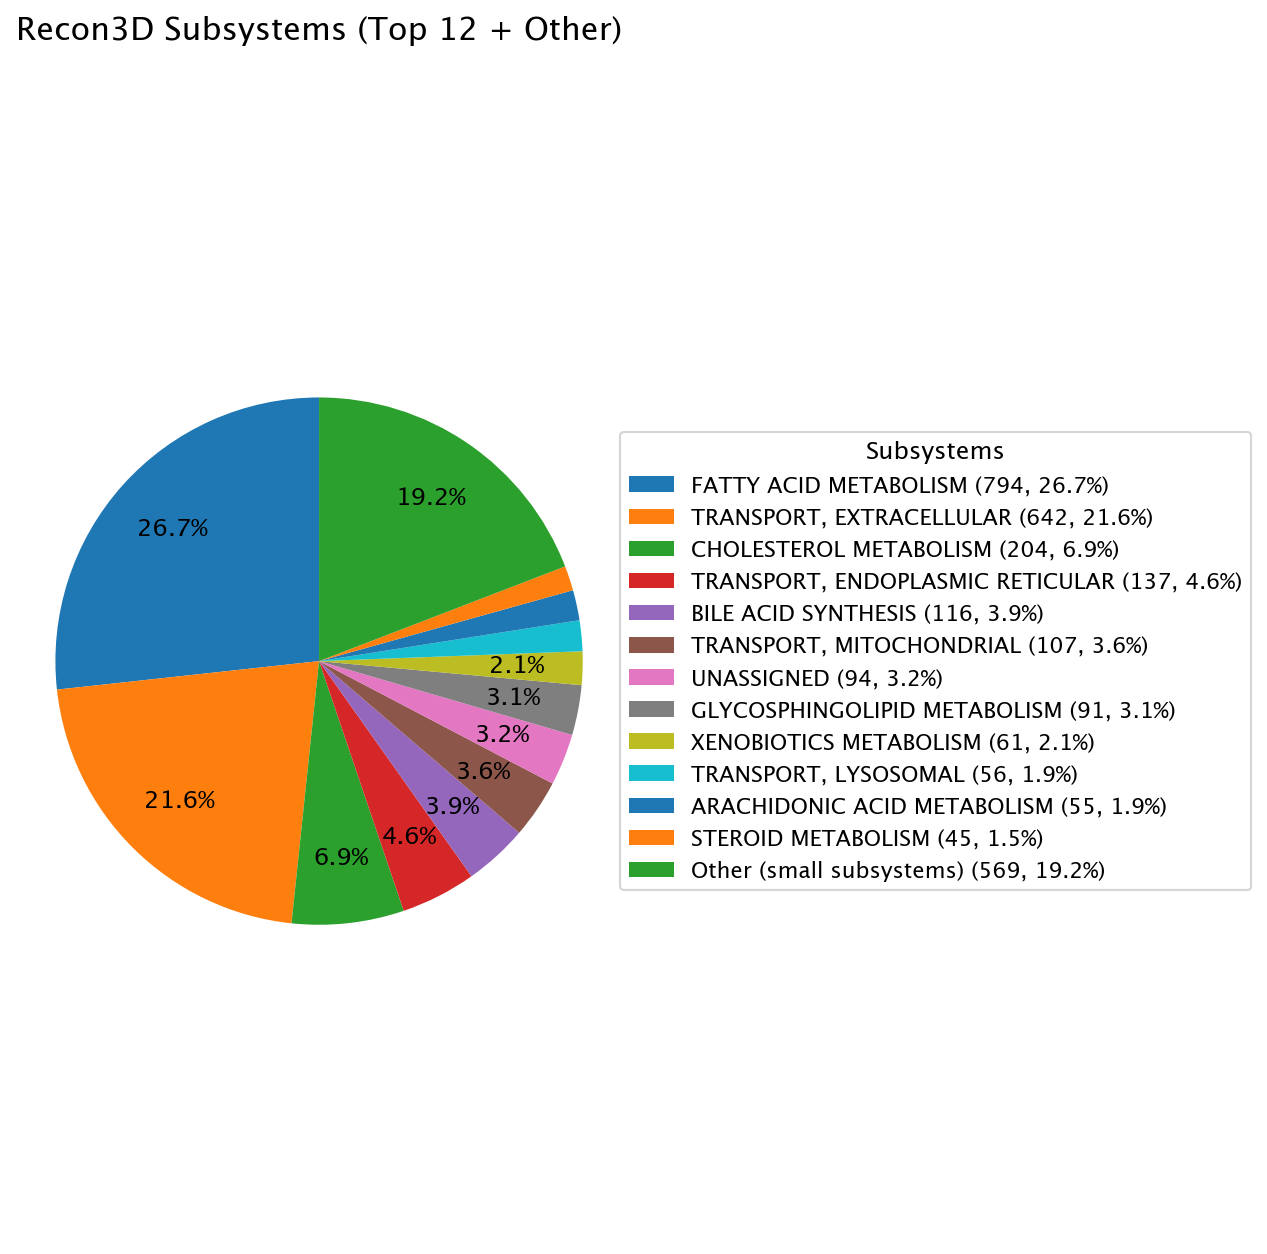

In [23]:
# ---------- Plot 1: Subsystems (publication styling, legend with counts+%) ----------
subs_series = aggregate_for_pie(recon3d_subs, top_n=12, other_label="Other (small subsystems)")
subs_labels = list(subs_series.index)
subs_values = subs_series.values

fig1 = plt.figure(figsize=(8, 8))
wedges, text_labels, autotexts = plt.pie(
    subs_values,
    labels=None,                        # use legend instead for clean look
    autopct=autopct_maker(2.0),         # show percents >= 2% to reduce clutter
    startangle=90,
    pctdistance=0.75,
    normalize=True,
    textprops={"fontsize": 11}
)
plt.title("Recon3D Subsystems (Top 12 + Other)", pad=20)
plt.axis('equal')
# Compact legend with counts and percentages
legend_texts = category_legend_labels(subs_labels, subs_values)
plt.legend(wedges, legend_texts, title="Subsystems", loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('../Analyses/recons_comparisons/recon3d_subs_pie_pub.svg', bbox_inches='tight')
plt.show()

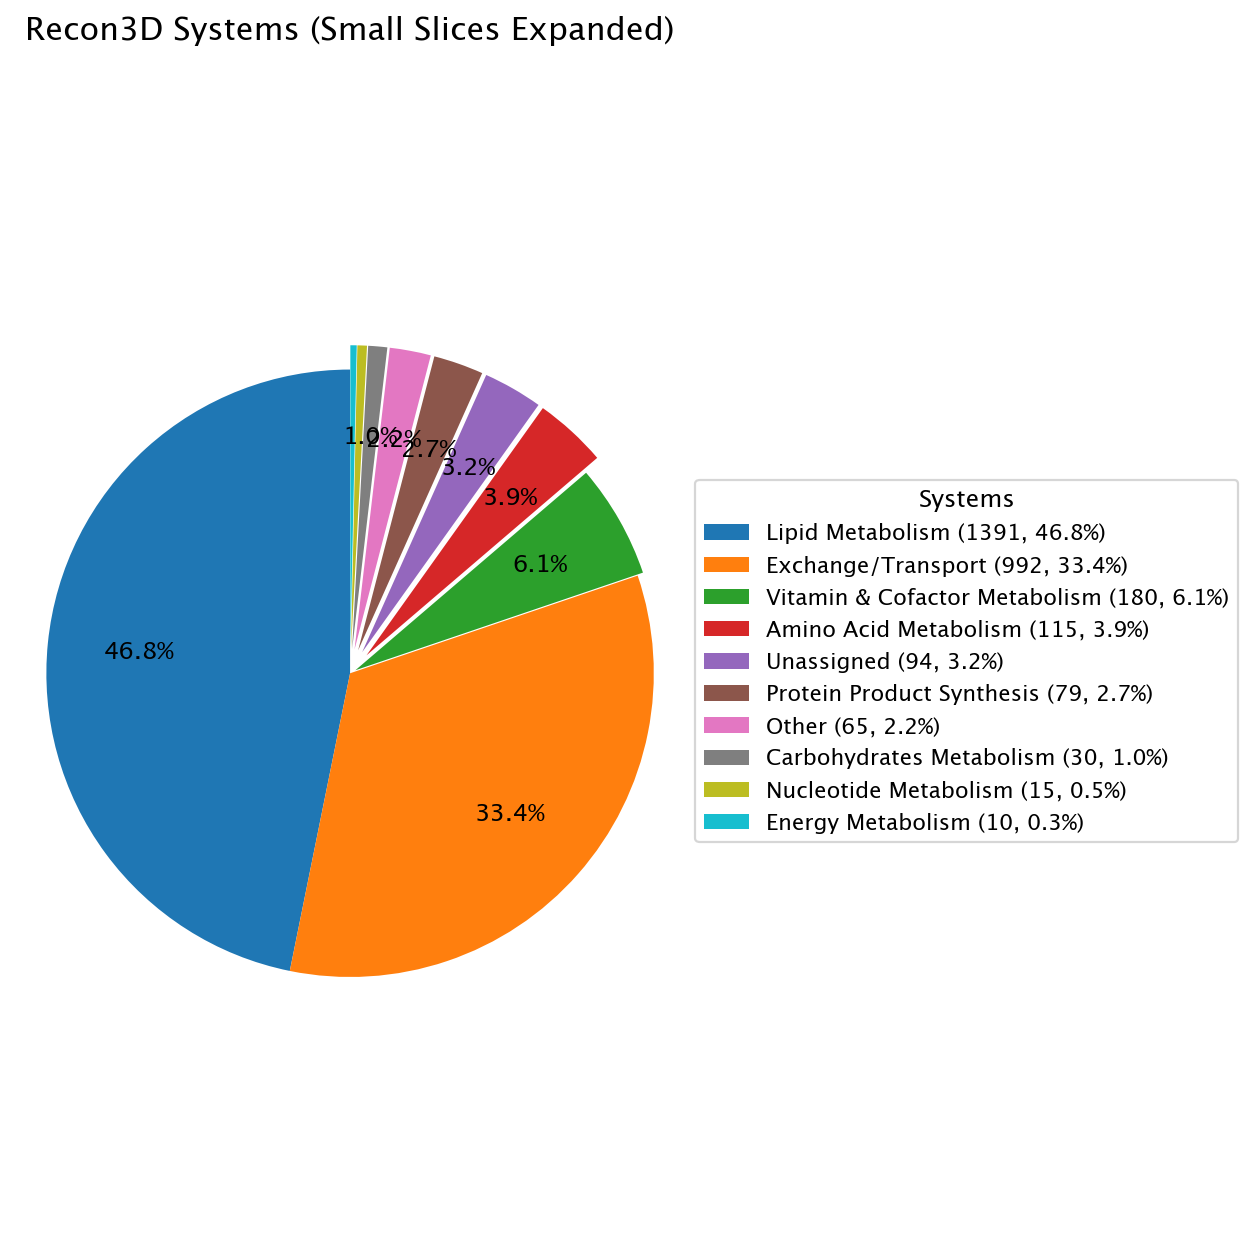

In [22]:
# ---------- Plot 2: Systems (explode small slices for visibility) ----------
sys_series = pd.Series(recon3d_sys).sort_values(ascending=False)
sys_labels = list(sys_series.index)
sys_values = sys_series.values
sys_total = float(np.sum(sys_values))
sys_pcts = sys_values / sys_total

# explode small slices (e.g., < 4% of total)
explode = [0.08 if p < 0.04 else 0.02 if p < 0.15 else 0.0 for p in sys_pcts]

fig2 = plt.figure(figsize=(8, 8))
wedges2, text_labels2, autotexts2 = plt.pie(
    sys_values,
    labels=None,                        # legend carries full labels
    autopct=autopct_maker(1.0),         # keep most percents, hide ultra-tiny
    explode=explode,
    startangle=90,
    pctdistance=0.7,
    normalize=True,
    textprops={"fontsize": 11}
)
plt.title("Recon3D Systems (Small Slices Expanded)", pad=20)
plt.axis('equal')
legend_texts2 = category_legend_labels(sys_labels, sys_values)
plt.legend(wedges2, legend_texts2, title="Systems", loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('../Analyses/recons_comparisons/recon3d_sys_pie_pub.svg', bbox_inches='tight')
plt.show()

### 5.2 Reactions extracted from the metabolic ATLAS database

In [12]:
# Subset of "only Recon3D" reactions

metabolic_atlas_subset = rxns.query("RECON3D == '-' and iCHO1766 == '-' and iCH02101 == '-' and iCHO2291 == '-'").copy()

In [13]:
# Calculate the amount of reactions per Subsystem and System

subs = []
for i,reaction in metabolic_atlas_subset.iterrows():
    subs.append(reaction['Subsystem'])
    
metabolic_atlas_subs = Counter(subs)

# Mapp subsystems to systems categories (need to define "category mapping" and "allocate_counts" Section 1)
metabolic_atlas_sys = allocate_counts(metabolic_atlas_subs, category_mapping)

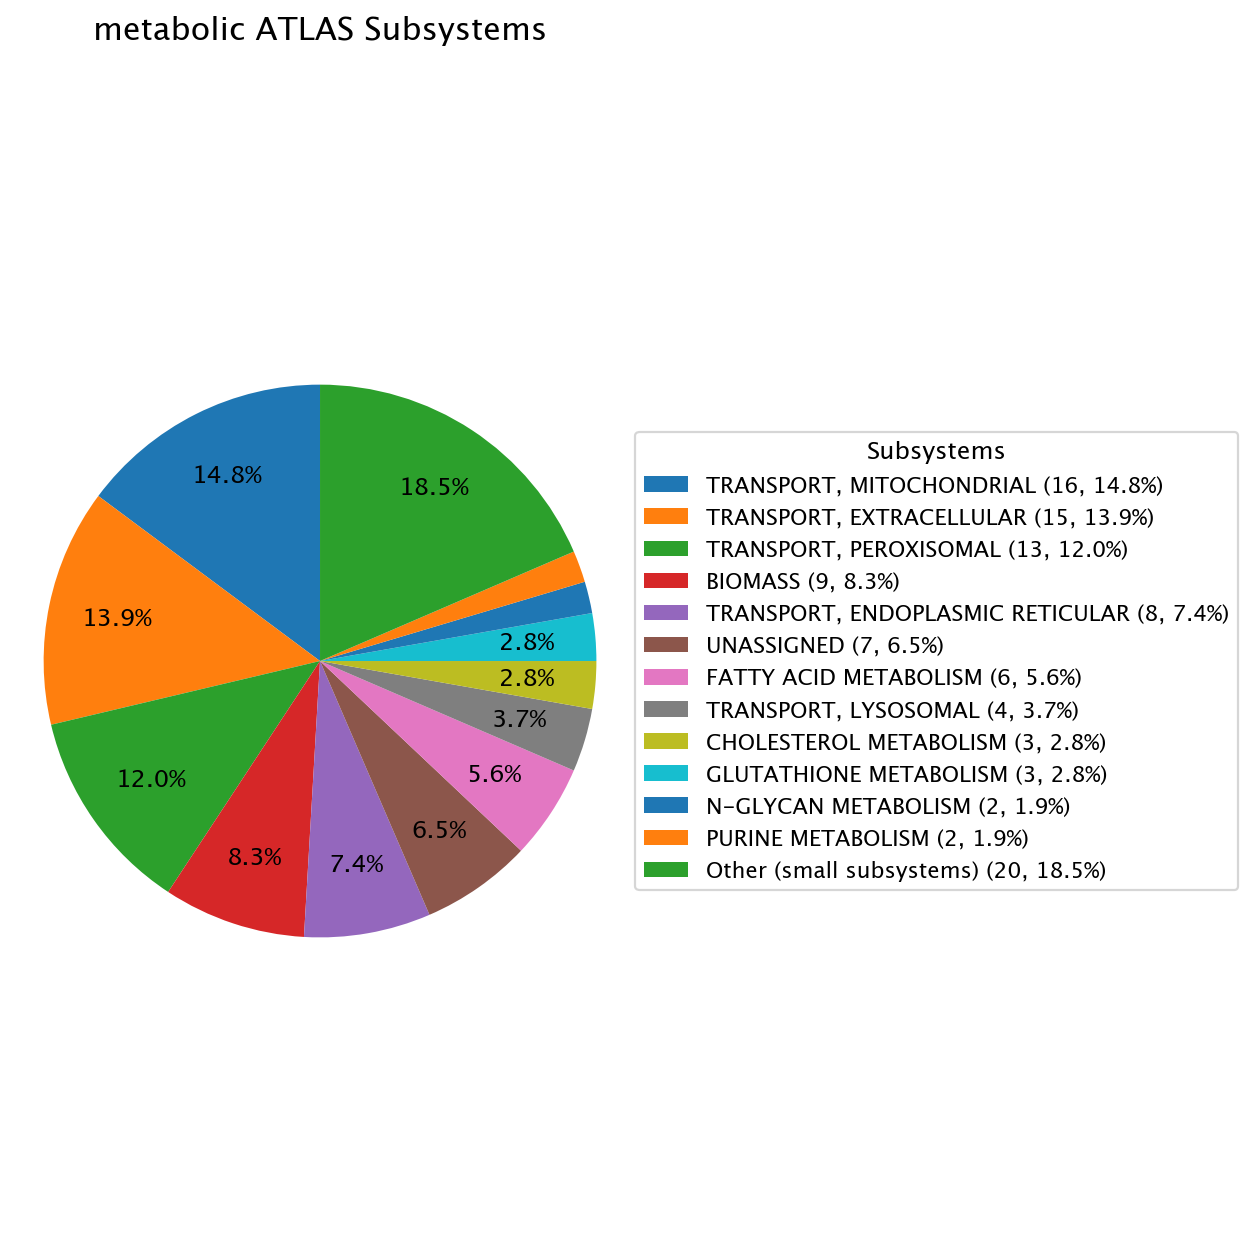

In [21]:
# ---------- Plot 1: Subsystems (publication styling, legend with counts+%) ----------
subs_series = aggregate_for_pie(metabolic_atlas_subs, top_n=12, other_label="Other (small subsystems)")
subs_labels = list(subs_series.index)
subs_values = subs_series.values

fig1 = plt.figure(figsize=(8, 8))
wedges, text_labels, autotexts = plt.pie(
    subs_values,
    labels=None,                        # use legend instead for clean look
    autopct=autopct_maker(2.0),         # show percents >= 2% to reduce clutter
    startangle=90,
    pctdistance=0.75,
    normalize=True,
    textprops={"fontsize": 11}
)
plt.title("metabolic ATLAS Subsystems", pad=20)
plt.axis('equal')
# Compact legend with counts and percentages
legend_texts = category_legend_labels(subs_labels, subs_values)
plt.legend(wedges, legend_texts, title="Subsystems", loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('../Analyses/recons_comparisons/metatlas_subs_pie_pub.svg', bbox_inches='tight')
plt.show()

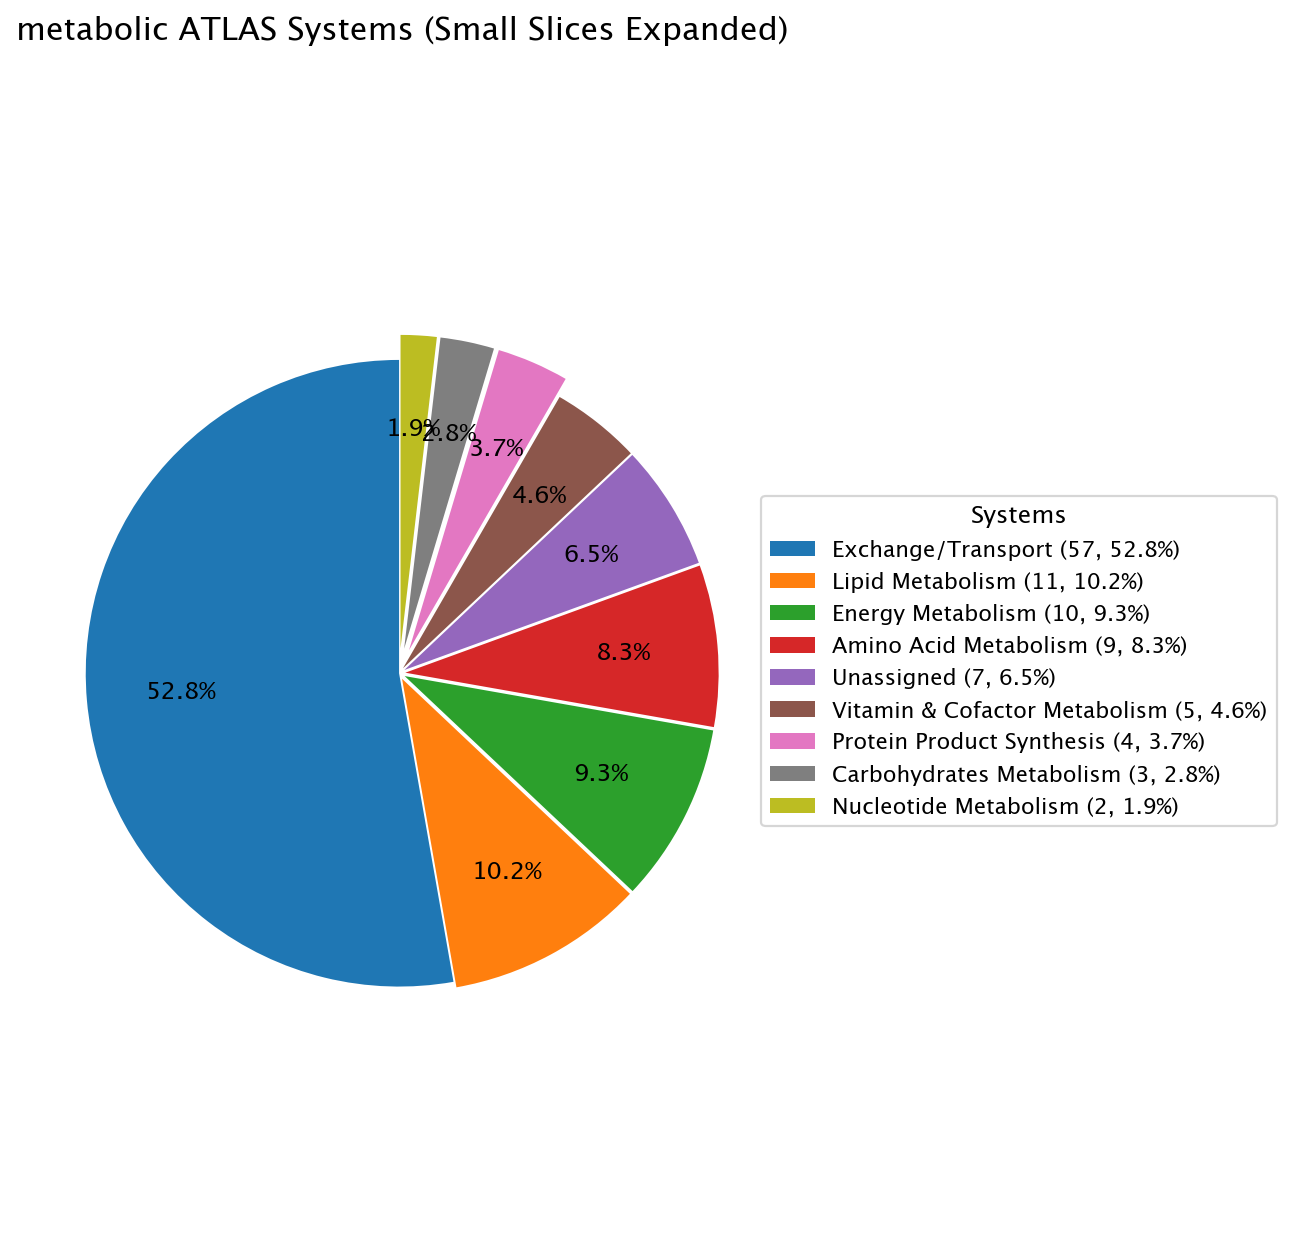

In [20]:
# ---------- Plot 2: Systems (explode small slices for visibility) ----------
sys_series = pd.Series(metabolic_atlas_sys).sort_values(ascending=False)
sys_labels = list(sys_series.index)
sys_values = sys_series.values
sys_total = float(np.sum(sys_values))
sys_pcts = sys_values / sys_total

# explode small slices (e.g., < 4% of total)
explode = [0.08 if p < 0.04 else 0.02 if p < 0.15 else 0.0 for p in sys_pcts]

fig2 = plt.figure(figsize=(8, 8))
wedges2, text_labels2, autotexts2 = plt.pie(
    sys_values,
    labels=None,                        # legend carries full labels
    autopct=autopct_maker(1.0),         # keep most percents, hide ultra-tiny
    explode=explode,
    startangle=90,
    pctdistance=0.7,
    normalize=True,
    textprops={"fontsize": 11}
)
plt.title("metabolic ATLAS Systems (Small Slices Expanded)", pad=20)
plt.axis('equal')
legend_texts2 = category_legend_labels(sys_labels, sys_values)
plt.legend(wedges2, legend_texts2, title="Systems", loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('../Analyses/recons_comparisons/metatlas_sys_pie_pub.svg', bbox_inches='tight')
plt.show()